In [2]:
import turicreate as tc

In [3]:
data = tc.SFrame('~/turi_test/turi_stone.sframe')
data


image,name,annotations
Height: 100 Width: 100,steintest_14_02.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_09_07.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_09_07.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_37_19.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_23_14.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_23_14.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_15_05.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_15_05.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_31_45.png,"[{'label': 'stone','coordinates': {'x': ..."
Height: 100 Width: 100,steintest_25_09.png,"[{'label': 'stone','coordinates': {'x': ..."


In [4]:
# Make a train-test split
train_data, test_data = data.random_split(0.85)

In [28]:
# Create a model
model = tc.object_detector.create(train_data, feature="image", annotations="annotations", grid_shape = [21,21])

KeyboardInterrupt: 

In [11]:
# Save predictions to an SArray


In [8]:
# Evaluate the model and save the results into a dictionary


0.7954992651939392

In [23]:
data['image_with_ground_truth'] = \
    tc.object_detector.util.draw_bounding_boxes(data['image'], data['annotations'])
data.explore()


,image,image_with_predictions
0,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_29_10.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 91.0, 'width': 6, 'y': 10.5, 'height': 9}}]}",
1,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_29_10.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 90.5, 'width': 9, 'y': 74.5, 'height': 13}}, {'label': 'stone', 'coordinates': {'x': 68.0, 'width': 12, 'y': 49.0, 'height': 12}}, {'label': 'stone', 'coordinates': {'x': 61.5, 'width': 7, 'y': 14.0, 'height': 10}}, {'label': 'stone', 'coordinates': {'x': 77.5, 'width': 7, 'y': 68.5, 'height': 9}}, {'label': 'stone', 'coordinates': {'x': 34.0, 'width': 4, 'y': 11.0, 'height': 6}}]}",
2,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_17_04.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 68.0, 'width': 8, 'y': 26.0, 'height': 8}}]}",
3,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_25_43.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 54.0, 'width': 8, 'y': 18.0, 'height': 16}}]}",
4,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_38_28.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 22.0, 'width': 10, 'y': 54.5, 'height': 11}}, {'label': 'stone', 'coordinates': {'x': 45.0, 'width': 10, 'y': 38.0, 'height': 16}}, {'label': 'stone', 'coordinates': {'x': 30.0, 'width': 10, 'y': 25.0, 'height': 10}}, {'label': 'stone', 'coordinates': {'x': 22.0, 'width': 10, 'y': 54.5, 'height': 11}}, {'label': 'stone', 'coordinates': {'x': 10.0, 'width': 4, 'y': 17.0, 'height': 8}}, {'label': 'stone', 'coordinates': {'x': 2.5, 'width': 5, 'y': 19.0, 'height': 6}}, {'label': 'stone', 'coordinates': {'x': 30.0, 'width': 10, 'y': 25.0, 'height': 10}}, {'label': 'stone', 'coordinates': {'x': 51.0, 'width': 6, 'y': 29.5, 'height': 7}}, {'label': 'stone', 'coordinates': {'x': 45.0, 'width': 10, 'y': 38.0, 'height': 16}}]}",
5,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_15_20.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 86.5, 'width': 5, 'y': 68.0, 'height': 6}}]}",
6,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_17_06.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 26.5, 'width': 7, 'y': 14.0, 'height': 12}}, {'label': 'stone', 'coordinates': {'x': 73.5, 'width': 9, 'y': 9.0, 'height': 12}}, {'label': 'stone', 'coordinates': {'x': 83.0, 'width': 6, 'y': 21.5, 'height': 9}}, {'label': 'stone', 'coordinates': {'x': 70.5, 'width': 7, 'y': 31.5, 'height': 5}}, {'label': 'stone', 'coordinates': {'x': 4.5, 'width': 5, 'y': 46.5, 'height': 11}}, {'label': 'stone', 'coordinates': {'x': 11.5, 'width': 7, 'y': 37.0, 'height': 8}}, {'label': 'stone', 'coordinates': {'x': 15.0, 'width': 10, 'y': 49.0, 'height': 8}}, {'label': 'stone', 'coordinates': {'x': 41.0, 'width': 6, 'y': 43.0, 'height': 6}}, {'label': 'stone', 'coordinates': {'x': 22.5, 'width': 9, 'y': 25.0, 'height': 8}}, {'label': 'stone', 'coordinates': {'x': 83.0, 'width': 6, 'y': 21.5, 'height': 9}}]}",
7,"{'image': Height: 100px Width: 100px Channels: 1 , 'name': 'steintest_17_28.png', 'annotations': [{'label': 'stone', 'coordinates': {'x': 24.5, 'width': 5, 'y': 24.5, 'height': 9}}, {'label': 'stone', 'coordinates': {'x': 66.0, 'width': 6, 'y': 19.0, 'height': 10}}, {'label': 'stone', 'coordinates': {'x': 43.5, 'width': 3, 'y': 26.5, 'height': 5}}, {'label': 'stone', 'coordinates': {'x': 66.0, 'width': 6, 'y': 32.0, 'height': 10}}, {'label': 'stone', 'coordinates': {'x': 50.5, 'width': 7, 'y': 14.5, 'height': 5}}, {'label': 'stone', 'coordinates': {'x': 24.5, 'width': 5, 'y': 24.5, 'height': 9}}, {'label': 'stone', 'coordinates': {'x': 49.0, 'width': 8, 'y': 69.0, 'height': 14}}, {'label': 'stone', 'coordinates': {'x': 9.5, 'width': 5, 'y': 3.5, 'height': 7}}, {'label': 'stone', 'coordinates': {'x': 50.5, 'width': 7, 'y': 14.5, 'height': 5}}, {'label': 'sto
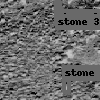
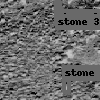
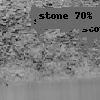
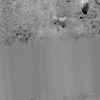
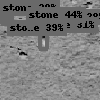
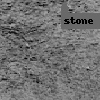
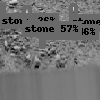
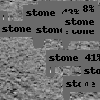
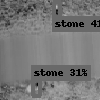
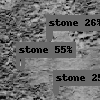
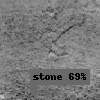
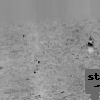
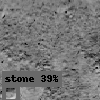
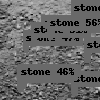
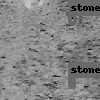
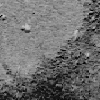
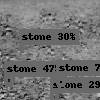
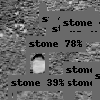
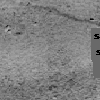
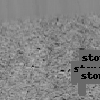
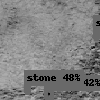
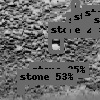
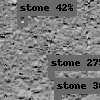
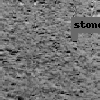
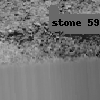
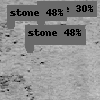
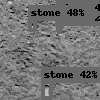
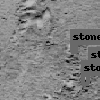
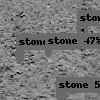
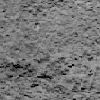
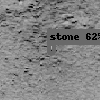
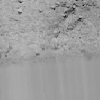
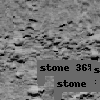
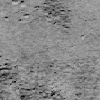
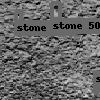
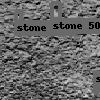
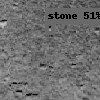
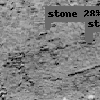
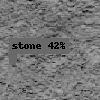
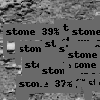
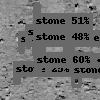
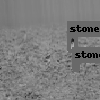
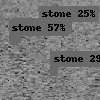
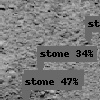
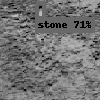
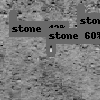
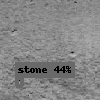
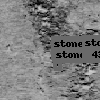
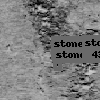
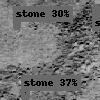
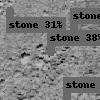
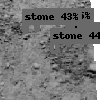
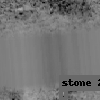
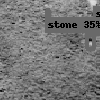
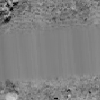
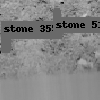
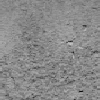
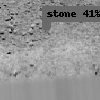
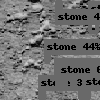
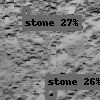
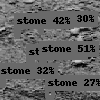
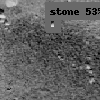
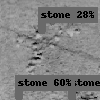
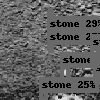
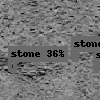
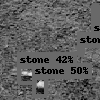
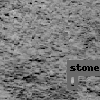
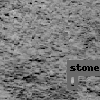
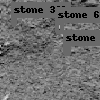
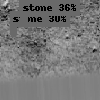
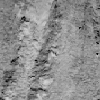
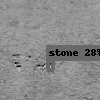
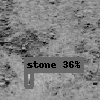
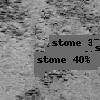
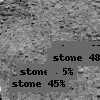
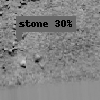
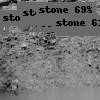
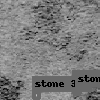
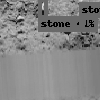
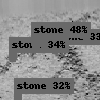
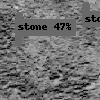
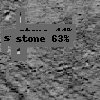
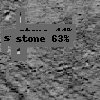
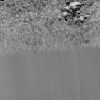
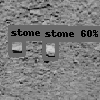
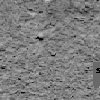
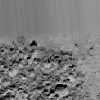
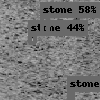
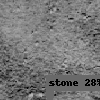
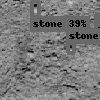
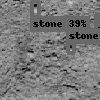
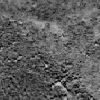
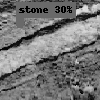
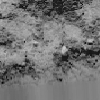
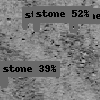
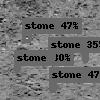
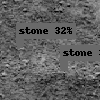
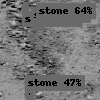
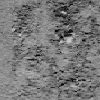
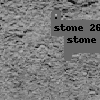

In [33]:
test = tc.SFrame({'image': test_data})
test['predictions'] = model.predict(test_data)

metrics = model.evaluate(test_data)
metrics

predictions_stacked = tc.object_detector.util.stack_annotations(test['predictions'])

test['image_with_predictions'] = \
    tc.object_detector.util.draw_bounding_boxes(test_data['image'], test['predictions'])

test[['image', 'image_with_predictions']].explore()

In [7]:
# Save the model for later use in Turi Create
model.save('turi_test.model')

# Export for use in Core ML
model.export_coreml('stone_detector.mlmodel')